In [84]:
from math import exp, sin
import numpy as np
import matplotlib.pyplot as plt

In [85]:
def f(x):
    return sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

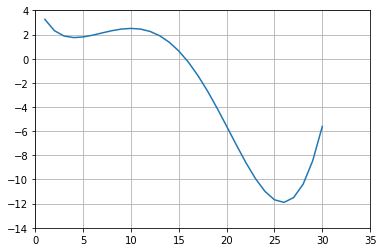

In [126]:
x = range(1, 31)
plt.plot(x, [f(val) for val in x])
plt.grid()
plt.axis([0, 35, -14, 4])
plt.show()

In [80]:
from scipy.optimize import minimize

###### Минимизация гладкой функции

In [103]:
ans_in_2 = minimize(f, x0=2, method="BFGS")
ans_in_2

      fun: 1.7452682903447336
 hess_inv: array([[5.98752645]])
      jac: array([-2.04145908e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627628])

In [104]:
ans_in_30 = minimize(f, x0=30, method="BFGS")
ans_in_30

      fun: -11.898894665981313
 hess_inv: array([[1.67936744]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.88019321])

In [105]:
with open("answer_1.txt", "w") as out:
    out.write(f"{round(ans_in_2.fun, 2)} {round(ans_in_30.fun, 2)}")

###### Глобальная оптимизация

In [106]:
from scipy.optimize import differential_evolution

In [109]:
bounds = [(1, 30)]
ans_diff_evo = differential_evolution(f, bounds=bounds)
ans_diff_evo

     fun: -11.89889466542836
     jac: array([-2.55795385e-05])
 message: 'Optimization terminated successfully.'
    nfev: 64
     nit: 3
 success: True
       x: array([25.88014992])

In [110]:
print(f"Iterations for minimize: {ans_in_30.nit}")
print(f"Iterations for differential_evolution: {ans_diff_evo.nit}")

Iterations for minimize: 6
Iterations for differential_evolution: 3


In [112]:
with open("answer_2.txt", "w") as out:
    out.write( str( round(ans_diff_evo.fun, 2) ) )

##### Минимизация негладкой функции

In [113]:
def h(x):
    return int(f(x))

In [114]:
x = range(1, 31)
y = [h(val) for val in x]

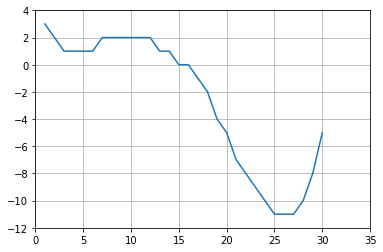

In [124]:
plt.plot(x, y)
plt.grid()
plt.axis([0, 35, -12, 4])
plt.show()

In [127]:
min_bfgs = minimize(h, 30, method="BFGS")
min_bfgs

      fun: -5
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])

###### BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции

In [129]:
min_diff_evo = differential_evolution(h, bounds)
min_diff_evo

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 77
     nit: 4
 success: True
       x: array([26.76104787])

In [131]:
with open("answer_3.txt", "w") as out:
    out.write(f"{min_bfgs.fun} {min_diff_evo.fun}")